In [46]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

from LoadMultiFiles import LoadOneFileUproot

dir_LS = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/try_save_information.root", name_branch="GdLS_log",
                           return_list=False)
print(dir_LS.keys())

dict_keys(['Edep_event', 'evtID', 'xyz_center', 'step_pdgID', 'step_trackID', 'step_x', 'step_y', 'step_z', 'step_t', 'step_Edep', 'step_Equench', 'step_DeltaKineticE', 'step_dx', 'step_chamberID', 'step_isCherenkov'])


In [47]:
dir_geninfo = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/try_save_information.root", name_branch="genInfo",
                           return_list=False)
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/")
from FunctionFor_dE_dx import GetDirForNoOpticalAnalyze
pdgID_certain,dir_dE_dx =GetDirForNoOpticalAnalyze(dir_LS,dir_geninfo)

dict_keys(['Einit', 'dE_dx', 'Equench', 'Edep', 'dx', 'index'])
[1000010020]


Text(0.5, 1.0, 'Beam Energy = 1752.5007893077795 MeV/u')

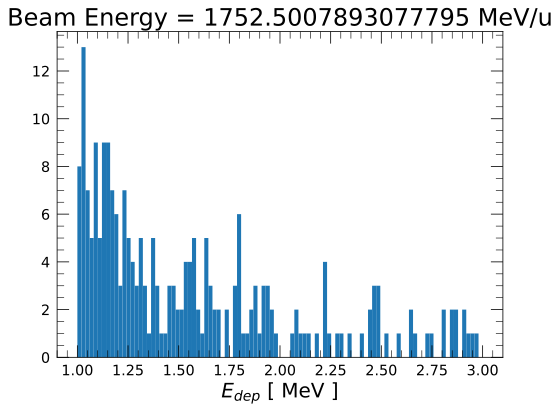

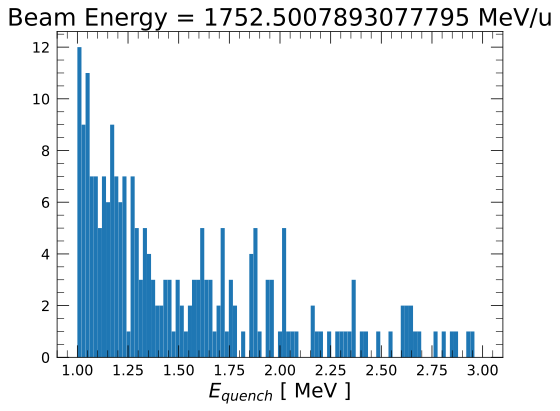

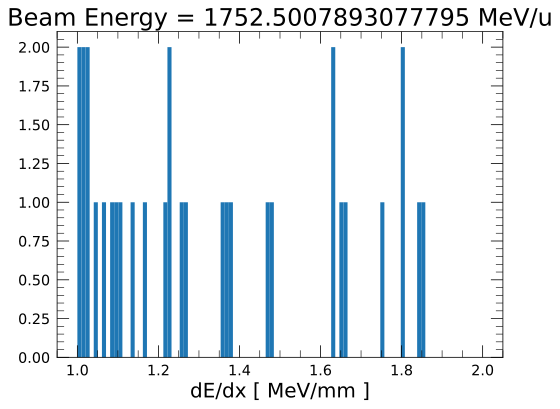

In [50]:
print(dir_dE_dx.keys())
print(dir_LS["step_pdgID"][0])
E_down = 1
E_up = 3
E_u =dir_dE_dx['Einit'][0]

plt.hist(dir_dE_dx["Equench"],bins=np.linspace(E_down,E_up,100))
# plt.semilogy()
plt.xlabel("$E_{dep}$ [ MeV ]")
plt.title(f"Beam Energy = {E_u} MeV/u")

plt.figure()
plt.hist(dir_dE_dx["Edep"],bins=np.linspace(E_down,E_up,100))
plt.xlabel("$E_{quench}$ [ MeV ]")
plt.title(f"Beam Energy = {E_u} MeV/u")
# plt.semilogy()

plt.figure()
plt.hist(dir_dE_dx["dE_dx"],bins=np.linspace(1,2,100))
plt.xlabel("dE/dx [ MeV/mm ]")
plt.title(f"Beam Energy = {E_u} MeV/u")
# plt.semilogy()